**Questions**
1. What are the different property types in the dataset?

2. Which neighborhood group has the highest number of listings?

3. Which neighborhood group has the highest average prices for Airbnb listings?

4. Is there a relationship between the construction year of property and price?

5. Who are the top 10 hosts by calculated host listing count?

6. Are hosts with verified identities more likely to receive positive reviews?

7. Is there a correlation between the price of a listing and its service fee?

8. What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?

9. Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [57]:
#read the Airbnb data
try:
    df=pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx', low_memory= False)
except Exception as e:
    print(f"Error reading as CSV: {e}")
    # If reading as CSV fails, you might want to try other encodings or delimiters
    # or inform the user that the file might not be a CSV either.

Error reading as CSV: read_excel() got an unexpected keyword argument 'low_memory'


In [58]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009,1060.0,212.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83390 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83390 non-null  int64         
 1   NAME                            83390 non-null  object        
 2   host id                         83390 non-null  object        
 3   host_identity_verified          83390 non-null  object        
 4   host name                       83390 non-null  object        
 5   neighbourhood group             83390 non-null  object        
 6   neighbourhood                   83390 non-null  object        
 7   lat                             83390 non-null  float64       
 8   long                            83390 non-null  float64       
 9   country                         83390 non-null  object        
 10  country code                    83390 non-null  object        
 11  instan

In [60]:
df.duplicated().value_counts()

,count
False,83390


In [61]:
#neighbourhood group was 'brookln' instead of 'Brooklym'
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365


**Problems Identified in Data**

1. 541 duplicate records.

2. Insufficient information in house_rules and license columns.

3. Dollar signs ($) and commas in price and service fee columns.

4. Currency not included in column titles for price/service fee.

5. Missing values in some records.

6. Wrong data types in columns like price, service fee, id, host_id, last_review, construction year.

7. Spelling error: “Brookkyl” instead of “Brooklyn” in neighbourhood_group.

8. Outliers in availability_365.


** Cleaning Steps**

1. Drop duplicate records.

2. Drop house_rules and license columns (insufficient data).

3. Remove $ and commas in price and service_fee columns.

4. Rename price and service_fee columns to include “$” in titles.

5. Handle missing values (drop or impute).

6. Fix mismatched data types (convert to correct formats).

7. Correct spelling of “Brookkyl” → “Brooklyn”.

8. Remove outliers in availability_365.

In [62]:
df.drop_duplicates(inplace=True)

# Process 'price' column
if 'price' in df.columns:
    df['price'] = df['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
    df.rename(columns={'price': 'price_$'}, inplace=True)
elif 'price_$' in df.columns:
    # If already renamed, ensure it's float type
    df['price_$'] = df['price_$'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
    df['price_$'] = df['price_$'].astype(float)
else:
    print("Error: 'price' or 'price_$' column not found.")

# Process 'service fee' column
if 'service fee' in df.columns:
    df['service fee'] = df['service fee'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
    df.rename(columns={'service fee': 'service_fee_$'}, inplace=True)
elif 'service_fee_$' in df.columns:
    # If already renamed, ensure it's float type
    df['service_fee_$'] = df['service_fee_$'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
    df['service_fee_$'] = df['service_fee_$'].astype(float)
else:
    print("Error: 'service fee' or 'service_fee_$' column not found.")


# The columns house_rules and license were likely already dropped or have different names.
# The previous attempt to drop them failed with KeyError, suggesting they might not be there.
# Let's skip dropping them for now and focus on the columns that are causing issues.
# df.drop(['house_rules', 'license'], axis=1, inplace=True)

# Handle missing values
df.dropna(inplace=True)

# Fix mismatched data types
# Ensure these columns exist after potential renames and dropna
if 'price_$' in df.columns:
    df['price_$'] = df['price_$'].astype(float)
if 'service_fee_$' in df.columns:
    df['service_fee_$'] = df['service_fee_$'].astype(float)
if 'host id' in df.columns:
    df['host id'] = df['host id'].astype(str)
if 'last review' in df.columns:
    # Ensure 'last review' is datetime
    df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
    df.dropna(subset=['last review'], inplace=True) # Drop rows where date conversion failed
if 'Construction year' in df.columns:
    # Ensure 'Construction year' is integer, handle potential NaNs introduced by dropna earlier
    # Convert to Int64 to handle potential NaNs before converting to int
    df['Construction year'] = df['Construction year'].astype(pd.Int64Dtype()).astype(int)


# Correct spelling of “Brookkyl” → “Brooklyn”.
# Check if 'neighbourhood group' column exists and has the value to replace
if 'neighbourhood group' in df.columns:
    df['neighbourhood group'] = df['neighbourhood group'].replace('brookln', 'Brooklyn')


# Remove outliers in availability_365. (This step requires defining what an outlier is and a method to remove them)
# Skipping outlier removal for now as it requires more specific instructions on how to identify/remove outliers.
# This can be addressed as a separate step if needed.

In [63]:
df.duplicated().value_counts()

,count
False,83390


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83390 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83390 non-null  int64         
 1   NAME                            83390 non-null  object        
 2   host id                         83390 non-null  object        
 3   host_identity_verified          83390 non-null  object        
 4   host name                       83390 non-null  object        
 5   neighbourhood group             83390 non-null  object        
 6   neighbourhood                   83390 non-null  object        
 7   lat                             83390 non-null  float64       
 8   long                            83390 non-null  float64       
 9   country                         83390 non-null  object        
 10  country code                    83390 non-null  object        
 11  instan

In [65]:
df.describe()

,id,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,8.339000e+04,83390.000000,83390.000000,83390.000000,83390.000000,83390.000000,83390.000000,83390.000000,83390.000000,83390,83390.000000,83390.000000,83390.000000,83390.000000
mean,2.957603e+07,40.727350,-73.948502,0.497710,2012.487768,626.216381,125.244454,7.406056,32.263701,2019-06-08 21:32:57.647199744,1.377374,3.278714,7.032822,141.788764
min,1.001254e+06,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.541650e+07,40.687643,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-25 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,3.075788e+07,40.721325,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,4.331842e+07,40.762600,-73.930802,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,5.735803e+07,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.621851e+07,0.056327,0.050342,0.499998,5.760504,331.807116,66.364942,28.105398,51.958583,NaN,1.751092,1.283684,29.555288,133.937411


What are the different property type in the dataset?

In [66]:
property_types = df['room type'].value_counts()
property_types

,count
room type,
Entire home/apt,44162
Private room,37474
Shared room,1646
Hotel room,108


Text(0.5, 1.0, 'Property Types and their count in the Dataset')

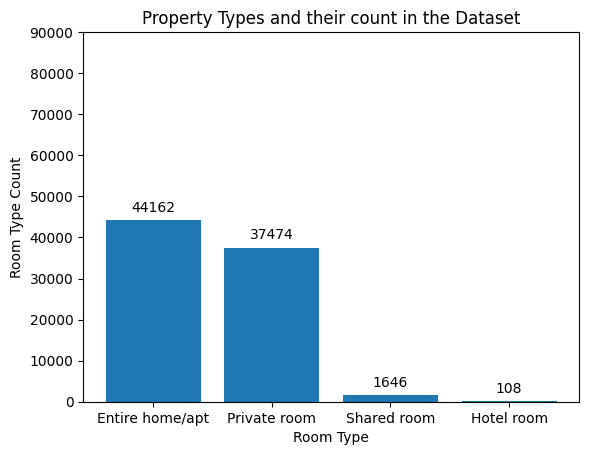

In [67]:
# Room type count plotted on a barchart
room_type_bar = plt.bar(
    property_types.index,                # x-axis: room types (e.g., Entire home, Private room)
    property_types       # y-axis: counts of each room type
)

# Adding labels on top of bars
plt.bar_label(
    room_type_bar,
    labels=property_types,  # Display counts on bars
    padding=4                               # Distance between bar and label
)

# Set y-axis limit (0 to 90,000 in this case)
plt.ylim([0, 90000])

# Axis labels and title
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.title('Property Types and their count in the Dataset')

which neighbourhood group has the height number of listings.

In [68]:
hood_group = df['neighbourhood group'].value_counts()
hood_group

,count
neighbourhood group,
Brooklyn,34622
Manhattan,34561
Queens,11124
Bronx,2267
Staten Island,816


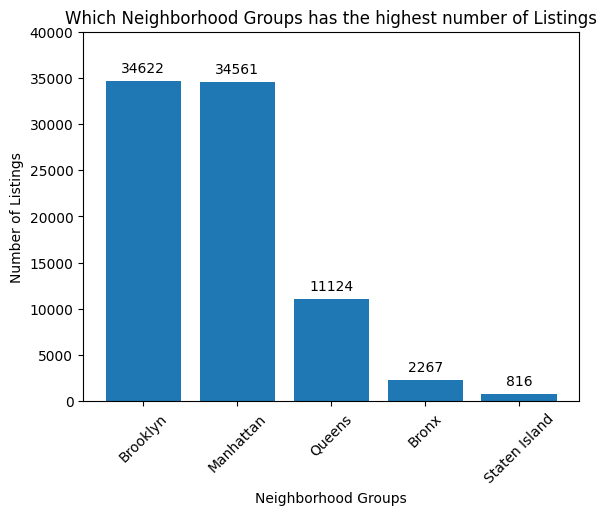

In [69]:
#which neighorhood group has the highest number of listings?
# Which neighborhood group has the highest number of listings?
hood_group_bar = plt.bar(hood_group.index, hood_group);

# Add labels on top of the bars
plt.bar_label(hood_group_bar, labels = hood_group, padding = 4);

# Set the Y-axis limit
plt.ylim([0,40000]);

# Label the axes
plt.xlabel('Neighborhood Groups');
plt.ylabel('Number of Listings');

# Rotate X-axis labels for better readability
plt.xticks(rotation = 45);

# Set the title
plt.title('Which Neighborhood Groups has the highest number of Listings');

# Show the plot
plt.show()

Which neighborhoods group have the highest average prices for Airbnb listings?

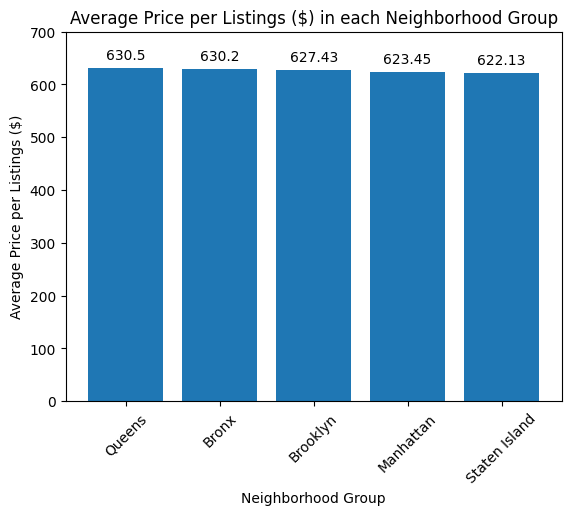

In [70]:
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()

# Create the bar chart
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:, "price_$"]);

# Add labels on top of the bars
# The labels are rounded to 2 decimal places.
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:, "price_$"], 2), label_type = 'edge', padding = 4);

# Set the Y-axis limit
plt.ylim([0,700]);

# Label the axes
plt.xlabel('Neighborhood Group');
plt.ylabel('Average Price per Listings ($)');

# Rotate X-axis labels for better readability
plt.xticks(rotation = 45);

# Set the title
plt.title('Average Price per Listings ($) in each Neighborhood Group');

# Show the plot
plt.show()

In [71]:
print(df.columns)

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price_$', 'service_fee_$', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')


 [21] #Is there a relationship between the construction year of property and price?


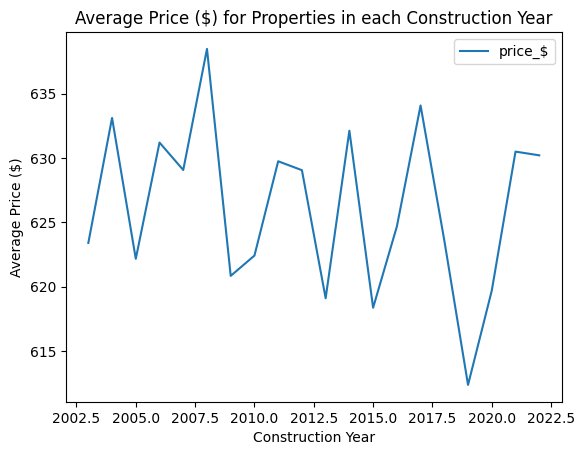

In [72]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();

# Label the axes
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');

# Set the title
plt.title('Average Price ($) for Properties in each Construction Year');

# Show the plot
plt.show()

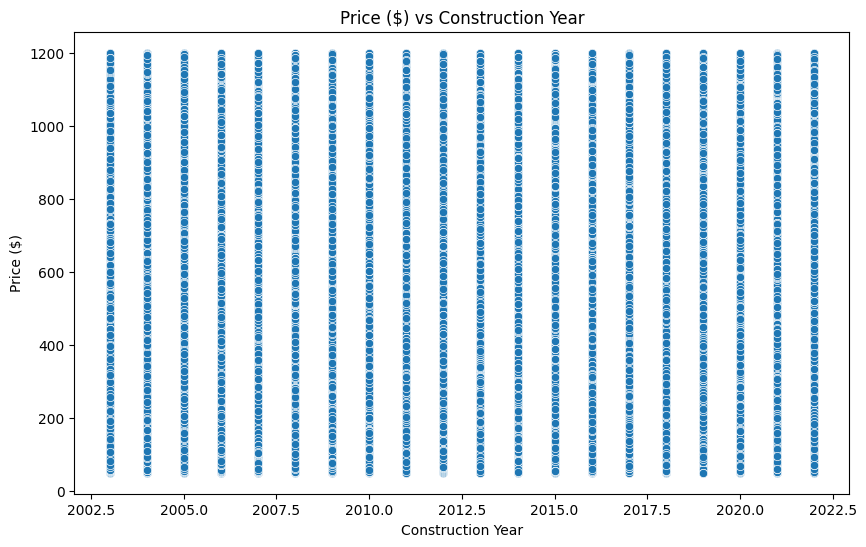

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Construction year', y='price_$')

# Label the axes
plt.xlabel('Construction Year')
plt.ylabel('Price ($)')

# Set the title
plt.title('Price ($) vs Construction Year')

# Show the plot
plt.show()

[22] #Who are the top 10 hosts by calculated host listing count?

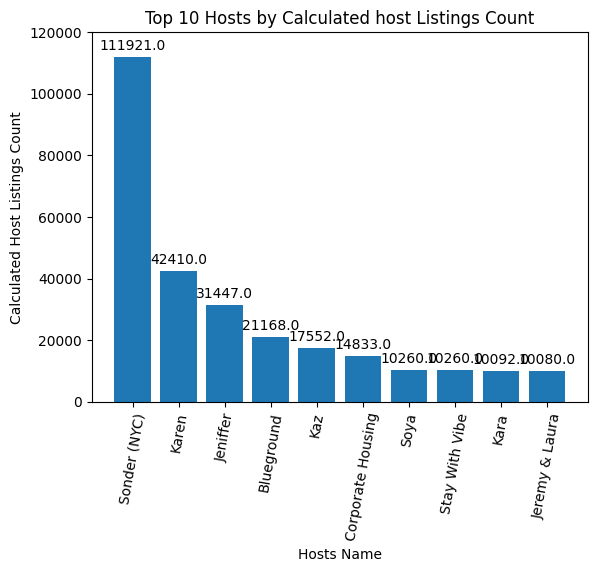

In [74]:
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).head(10).to_frame()

# Create the bar chart
hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count']);

# Add labels on top of the bars
plt.bar_label(hosts_bar, labels = hosts.loc[:, 'calculated host listings count'], label_type = 'edge', padding = 3);

# Label the axes
plt.xlabel('Hosts Name');
plt.ylabel('Calculated Host Listings Count');

# Rotate X-axis labels for better readability
plt.xticks(rotation = 80);

# Set the Y-axis limit
plt.ylim([0, 120000]);

# Set the title
plt.title('Top 10 Hosts by Calculated host Listings Count');

# Show the plot
plt.show()


The bar chart above illustrates the top 10 hosts based on the calculated listing count, with Sonder (NYC) notably leading with 111,921 listings. Subsequently, the other hosts follow in descending order.

Karen at second position with 42,410 hosts

Jeniffer at third position with 31,447 hosts

Blueground at fourth position with 21,168 hosts

Kaz at fifth position with 17,552 hosts

Corporate Housing at sixth position with 14,833 hosts

Soya at seventh position with 10,260 hosts

Stay with vibe at eight position with 10,260 hosts

Kara at ninth position with 10,092 hosts

and finally Jeremy and Laura at tenth position 10,080 hosts

Are hosts with verified identities more likely to receive positive reviews?

In [75]:
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()

# Display the resulting table/DataFrame (as shown in the image)
print(review)

                        review rate number
host_identity_verified                    
verified                          3.284107
unconfirmed                       3.273325


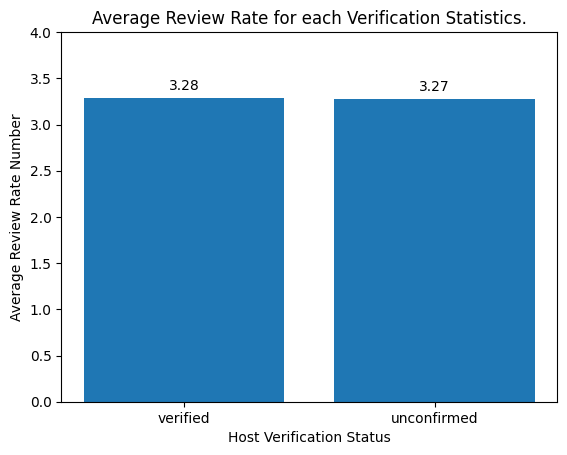

In [76]:
review_bar = plt.bar(review.index, review.loc[:, "review rate number"]);

# Add labels on top of the bars, rounded to 2 decimal places.
plt.bar_label(review_bar, labels = round(review.loc[:, "review rate number"], 2), padding = 4);

# Set the Y-axis limit
plt.ylim([0,4]);

# Label the axes
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');

# Set the title
plt.title('Average Review Rate for each Verification Statistics.');

# Show the plot
plt.show()


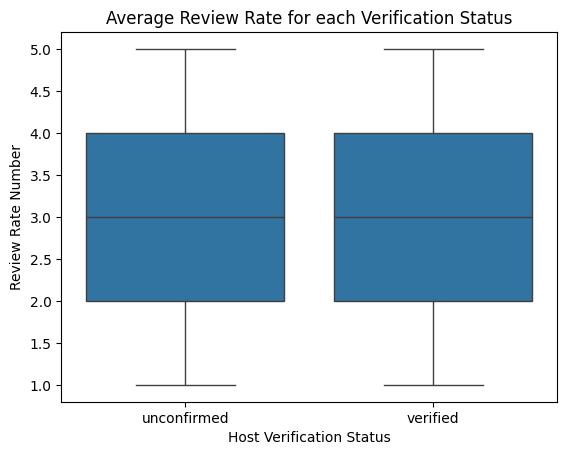

In [77]:
base_color = sns.color_palette()[0]

# Create the box plot comparing 'review rate number' across 'host_identity_verified' categories
sns.boxplot(data = df, x = "host_identity_verified", y = "review rate number", color = base_color);

# Label the axes
plt.xlabel('Host Verification Status');
plt.ylabel('Review Rate Number');

# Set the title
plt.title('Average Review Rate for each Verification Status');

# Show the plot
plt.show()

# Is there a correlation between the price of a listing and its service fee?

0.9999909085489923


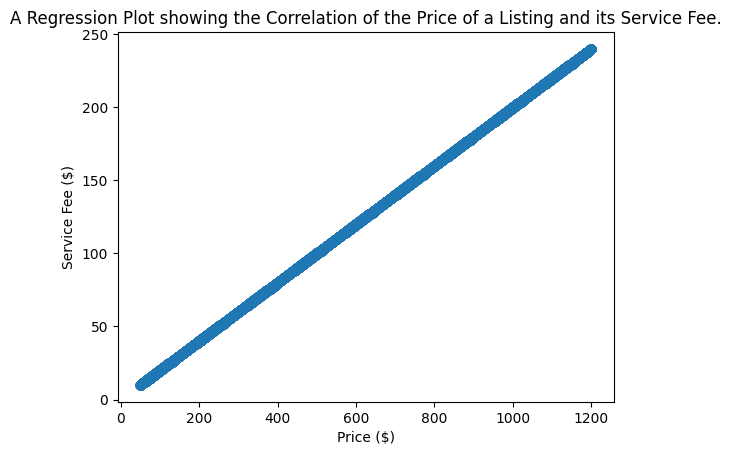

In [78]:
correlation = df['price_$'].corr(df['service_fee_$'])

# Display the correlation value (as shown in the image)
print(correlation)
# Expected output: 0.99991054957653 (or similar, indicating high correlation)


# --- Regression Plot ---
# [Code Snippet 2] [27]
sns.regplot(data = df, x = 'price_$', y = 'service_fee_$');

# Label the axes
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');

# Set the title
plt.title('A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee.');

# Show the plot
plt.show()


calculate the mean review rate for every unique combination of neighborhood group and room type.

In [79]:
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()

# Print the resulting DataFrame
ARRN


review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274773
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268930
                    Hotel room                 3.500000
                    Private room               3.285431
                    Shared room                3.261976
Queens              Entire home/apt            3.349528
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286

Text(0.5, 1.0, 'Average Review Rate for each Room/Property Type in each Neighbourhood Group.')

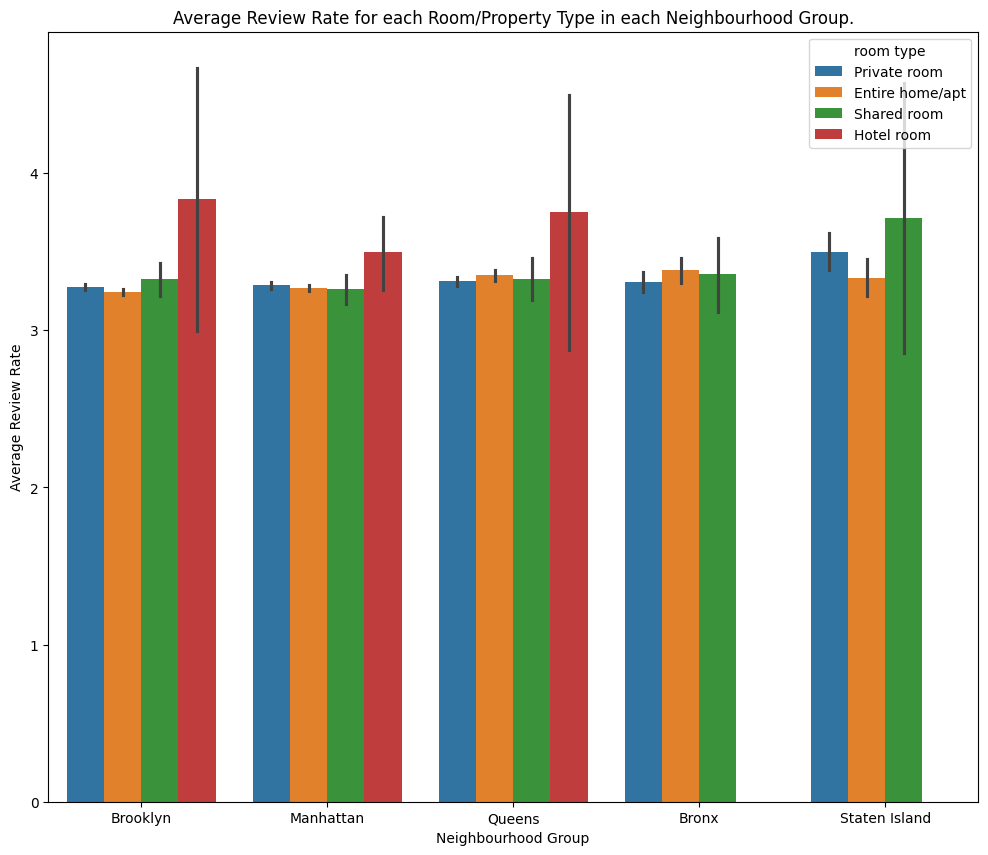

In [80]:
plt.figure(figsize = [12, 10])
sns.barplot(data = df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate')
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.')

Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

Text(0.5, 1.0, 'A Regression Plot of the Relationship between Calculated Host listings Count and Availability 365')

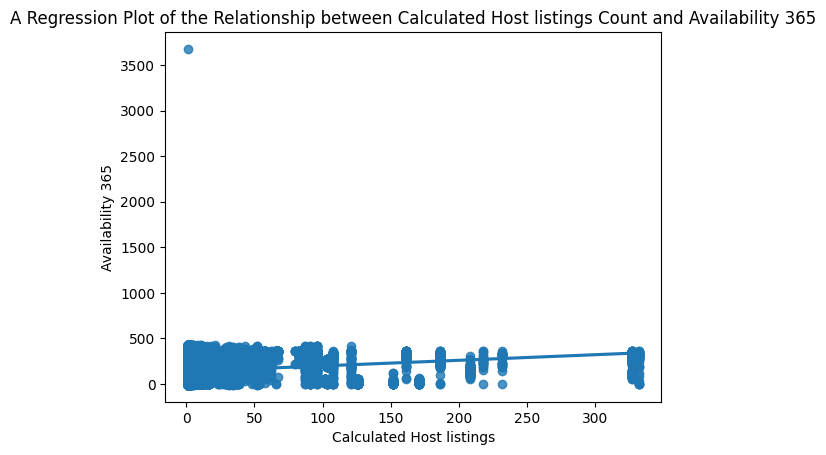

In [81]:
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365')
plt.xlabel('Calculated Host listings')
plt.ylabel('Availability 365')
plt.title('A Regression Plot of the Relationship between Calculated Host listings Count and Availability 365')

In [82]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.13536321456941783)

The Pearson correlation coefficient for the association between calculated host listings and availability 365 is 0.136, indicating a weak positive correlation between the two variables.

Conclusion

In conclusion, this project has provided a comprehensive analysis of the New York City Airbnb dataset, shedding light on various aspects of the short-term lodging market. Through data wrangling, exploratory data analysis (EDA), and interpretation of summary statistics, we've uncovered valuable insights into listing distribution, pricing dynamics, host, and review analysis.

Key findings include the dominance in counts of Entire home/apt listings, the variability in listing counts across neighborhood groups, and the downward trend between property construction year and price. Additionally, the analysis highlighted the significance of verified host status on review rates, as well as the strong correlation between listing price and service fee.

Furthermore, conducting sentiment analysis on guest reviews to understand factors driving customer satisfaction and preferences could inform targeted marketing strategies and product improvements for Airbnb. Lastly, expanding the analysis to include predictive modeling techniques, such as regression or machine learning algorithms, could enable forecasting of listing demand, pricing trends, and customer behavior, facilitating strategic decision-making for stakeholders in the short-term lodging industry.